<a href="https://colab.research.google.com/github/nishuchy/AI-works/blob/main/Project_B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Tabel of Contents:

##### Import Libraries(#1)

##### Load Dataset(#2)

##### Bert Model(#4)

##### Evaluation(#3)

##### Predictive for Test(#8)

how complete this project. Here's the step-by-step plan:

### **1. Preprocessing**
- **Text Cleaning**: Remove stopwords, punctuations, and digits from `Clinical Notes`.
- **Tokenization**: Convert text into meaningful tokens.
- **Embedding**: Convert text into numerical form (TF-IDF, Word2Vec, or BERT).
- **Label Encoding**: Convert `Diagnosis` into categorical numerical labels.

### **2. Feature Extraction**
- Use **TF-IDF** or **Word2Vec** for classical ML models.
- Use **Word Embeddings (e.g., GloVe, FastText, or BERT)** for DL models.

### **3. Apply ML Models**
- **Random Forest**
- **Logistic Regression**
- **Support Vector Machine (SVM)**
- **Naïve Bayes**

### **4. Apply DL Models**
- **LSTM (Long Short-Term Memory)**
- **BiLSTM (Bidirectional LSTM)**
- **CNN for Text Classification**
- **BERT-based model (like DistilBERT or BioBERT)**



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
import re
import nltk


from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
from tensorflow.keras.optimizers import Adam


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
# Load the dataset
data = pd.read_csv("/content/clinical_notes_diagnosis_prediction_modified.csv")
data.head()

,Clinical Notes,Diagnosis
0,"A 35-year-old male presents with heartburn, re...",Gastroesophageal Reflux Disease
1,A 55-year-old male with a history of heavy alc...,Liver Cirrhosis
2,A 50-year-old male with a history of diabetes ...,Septic Shock
3,"A 35-year-old male presents with heartburn, re...",Gastroesophageal Reflux Disease
4,A 55-year-old female with a history of obesity...,Type 2 Diabetes Mellitus


In [ ]:
data.shape

(5000, 2)

In [ ]:
data['Clinical Notes'][1]

'A 55-year-old male with a history of heavy alcohol use presents with jaundice, abdominal pain, and swelling. Physical examination reveals hepatomegaly and ascites. Liver function tests show elevated ALT, AST, and bilirubin levels. An ultrasound of the liver shows signs of cirrhosis. The patient is advised to stop drinking alcohol and referred for liver transplantation evaluation.'

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Clinical Notes  5000 non-null   object
 1   Diagnosis       5000 non-null   object
dtypes: object(2)
memory usage: 78.3+ KB


In [ ]:
data.Diagnosis.value_counts()

,count
Diagnosis,
Type 2 Diabetes Mellitus,285
Peptic Ulcer Disease,281
Chronic Obstructive Pulmonary Disease,273
Acute Myocardial Infarction,272
Deep Vein Thrombosis,266
Cerebrovascular Accident,264
Rheumatoid Arthritis,251
Acute Renal Failure,249
Congestive Heart Failure,248


/tmp/ipython-input-8-1888440838.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


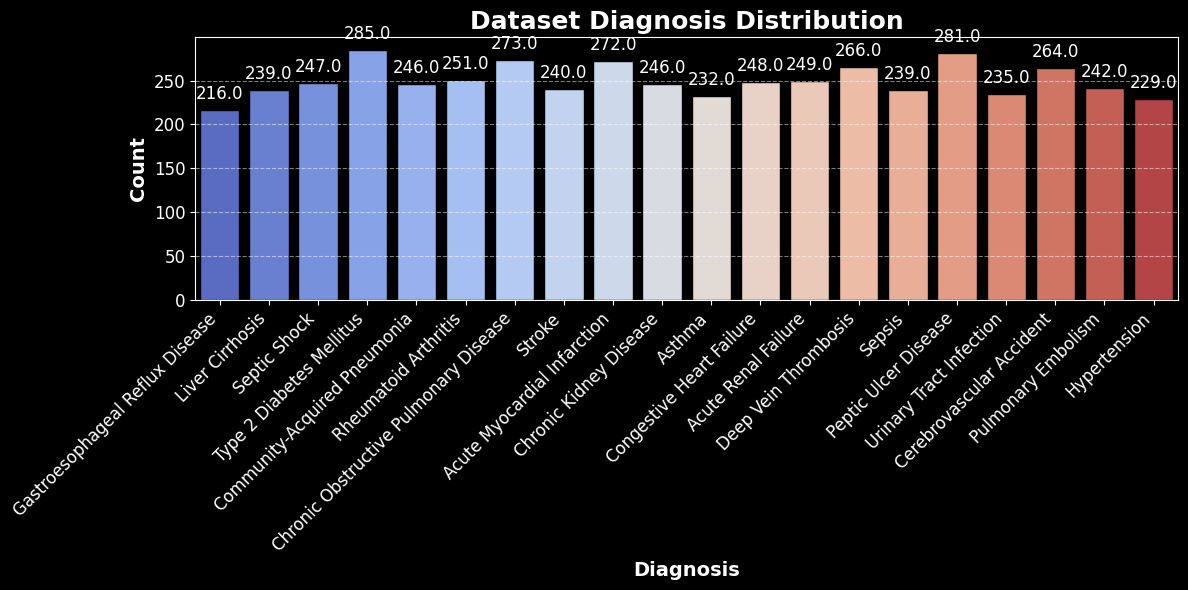

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size & dark background
plt.figure(figsize=(12, 6), facecolor='black')
plt.style.use('dark_background')

# Create count plot with enhanced design
ax = sns.countplot(
    x='Diagnosis', data=data, palette="coolwarm", edgecolor='black'
)

# Add title and labels
plt.title('Dataset Diagnosis Distribution', fontsize=18, fontweight='bold', color='white')
plt.xlabel("Diagnosis", fontsize=14, fontweight='bold', color='white')
plt.ylabel("Count", fontsize=14, fontweight='bold', color='white')

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right', fontsize=12, color='white')
plt.yticks(fontsize=12, color='white')

# Annotate bars with count values
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, color='white',
                xytext=(0, 5), textcoords='offset points')

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:

# plt.figure(figsize=(10, 8), facecolor='#121212')
# plt.style.use('dark_background')
# sns.countplot(x='Diagnosis', data=data, palette="Set1")
# plt.title('Dataset Diagnosis Distribution',fontsize=20)
# plt.xlabel("Diagnosis",fontsize=20)
# plt.ylabel("Count",fontsize=20)
# for p in plt.gca().patches:
#     plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
#                    ha='center', va='center', fontsize=10, color='white', xytext=(0, 5),
#                    textcoords='offset points')
# # Rotate x-axis labels
# plt.xticks(rotation=90)

# plt.tight_layout()
# plt.show()

In [ ]:

import nltk
import re
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords

In [ ]:
# Load stopwords
stop_words = set(stopwords.words('english'))
# Extended clean_text function with more steps
def clean_text(text):
    # Convert to string and lowercase the text
    text = str(text).lower()
    # Remove any numbers (you may want to modify this if numbers are important)
    text = re.sub(r'\d+', '', text)
    # Remove special characters, punctuation, and non-alphabetical characters
    text = re.sub(r'[^a-z\s]', '', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    # Remove stopwords
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

# Apply the cleaning function to the Clinical Notes column
data['Clinical Notes'] = data['Clinical Notes'].apply(clean_text)
# Show the cleaned data
data.head()

,Clinical Notes,Diagnosis
0,yearold male presents heartburn regurgitation ...,Gastroesophageal Reflux Disease
1,yearold male history heavy alcohol use present...,Liver Cirrhosis
2,yearold male history diabetes presents hypoten...,Septic Shock
3,yearold male presents heartburn regurgitation ...,Gastroesophageal Reflux Disease
4,yearold female history obesity hypertension pr...,Type 2 Diabetes Mellitus


                         Liver Cirrhosis  Other  Correlation Score
alcohol use                          229     11           0.954167
jaundice                             229     11           0.954167
ascites                              229     11           0.954167
hepatomegaly                         229     11           0.954167
elevated LFTs                        229     11           0.954167
cirrhosis mentioned                  229     11           0.954167
liver transplant                     229     11           0.954167
abdominal swelling/pain              229    250           0.478079


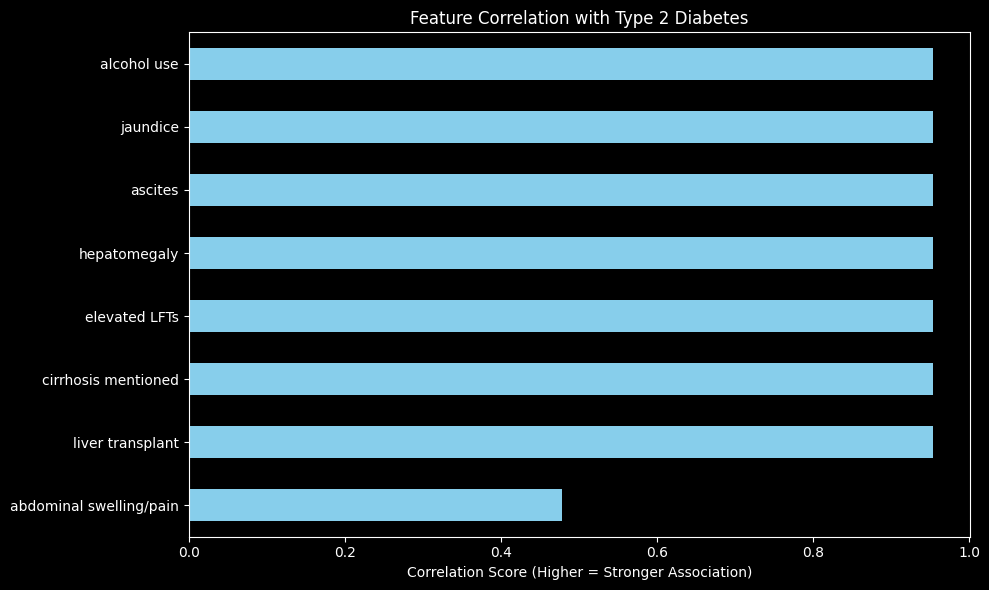

In [ ]:
# Define keywords to extract

from collections import defaultdict
keywords = {
    'alcohol use': r'alcohol use|alcoholic',
    'jaundice': r'jaundice',
    'ascites': r'ascites',
    'hepatomegaly': r'hepatomegaly',
    'abdominal swelling/pain': r'abdominal (pain|swelling)',
    'elevated LFTs': r'elevated (alt|ast|bilirubin)',
    'cirrhosis mentioned': r'cirrhosis',
    'liver transplant': r'liver transplantation|transplant evaluation',
    'portal hypertension': r'portal hypertension',
    'encephalopathy': r'encephalopathy'
}

# Feature extraction
feature_counts = defaultdict(lambda: {'Liver Cirrhosis': 0, 'Other': 0})

for _, row in data.iterrows():
    text = row['Clinical Notes'].lower()
    label = 'Liver Cirrhosis' if row['Diagnosis'] == 'Liver Cirrhosis' else 'Other'

    for key, pattern in keywords.items():
        if re.search(pattern, text):
            feature_counts[key][label] += 1

# Create DataFrame
results_df = pd.DataFrame(feature_counts).T
results_df['Total'] = results_df['Liver Cirrhosis'] + results_df['Other']
results_df['Correlation Score'] = results_df['Liver Cirrhosis'] / results_df['Total']

# Sort and display
results_df = results_df.sort_values(by='Correlation Score', ascending=False)
print(results_df[['Liver Cirrhosis', 'Other', 'Correlation Score']])

# Plot
plt.figure(figsize=(10, 6))
results_df['Correlation Score'].plot(kind='barh', color='skyblue')
plt.title('Feature Correlation with Type 2 Diabetes')
plt.xlabel('Correlation Score (Higher = Stronger Association)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [ ]:
# Label encoding for 'diagnosis' column
label_encoder = LabelEncoder()
data['Diagnosis'] = label_encoder.fit_transform(data['Diagnosis'])
data.head()

,Clinical Notes,Diagnosis
0,yearold male presents heartburn regurgitation ...,9
1,yearold male history heavy alcohol use present...,11
2,yearold male history diabetes presents hypoten...,16
3,yearold male presents heartburn regurgitation ...,9
4,yearold female history obesity hypertension pr...,18


In [ ]:
data.Diagnosis.unique()

array([ 9, 11, 16, 18,  6, 14,  5, 17,  0,  4,  2,  7,  1,  8, 15, 12, 19,
        3, 13, 10])

In [ ]:
# Assuming you have already fitted the LabelEncoder
decoded_diagnosis = label_encoder.inverse_transform([9, 11, 16, 18, 6, 14, 5, 17, 0, 4, 2, 7, 1, 8, 15, 12, 19, 3, 13, 10])

# Print the decoded diagnosis names
print(decoded_diagnosis)


['Gastroesophageal Reflux Disease' 'Liver Cirrhosis' 'Septic Shock'
 'Type 2 Diabetes Mellitus' 'Community-Acquired Pneumonia'
 'Rheumatoid Arthritis' 'Chronic Obstructive Pulmonary Disease' 'Stroke'
 'Acute Myocardial Infarction' 'Chronic Kidney Disease' 'Asthma'
 'Congestive Heart Failure' 'Acute Renal Failure' 'Deep Vein Thrombosis'
 'Sepsis' 'Peptic Ulcer Disease' 'Urinary Tract Infection'
 'Cerebrovascular Accident' 'Pulmonary Embolism' 'Hypertension']


In [ ]:
# Print all encoded label names
print(label_encoder.classes_)


['Acute Myocardial Infarction' 'Acute Renal Failure' 'Asthma'
 'Cerebrovascular Accident' 'Chronic Kidney Disease'
 'Chronic Obstructive Pulmonary Disease' 'Community-Acquired Pneumonia'
 'Congestive Heart Failure' 'Deep Vein Thrombosis'
 'Gastroesophageal Reflux Disease' 'Hypertension' 'Liver Cirrhosis'
 'Peptic Ulcer Disease' 'Pulmonary Embolism' 'Rheumatoid Arthritis'
 'Sepsis' 'Septic Shock' 'Stroke' 'Type 2 Diabetes Mellitus'
 'Urinary Tract Infection']


In [ ]:
# Assuming label_encoder is already fitted and 'Diagnosis' column is label encoded

# Decode the label values back to the original diagnosis names
decoded_diagnosis = label_encoder.inverse_transform(data['Diagnosis'])

# Add the decoded diagnosis back to the dataframe
data['Decoded_Diagnosis'] = decoded_diagnosis

# Display the updated dataframe
print(data[['Diagnosis', 'Decoded_Diagnosis']].head())


   Diagnosis                Decoded_Diagnosis
0          9  Gastroesophageal Reflux Disease
1         11                  Liver Cirrhosis
2         16                     Septic Shock
3          9  Gastroesophageal Reflux Disease
4         18         Type 2 Diabetes Mellitus


In [ ]:
# Assuming the label_encoder and data are already defined

# Decode the label values back to the original diagnosis names
decoded_diagnosis = label_encoder.inverse_transform(data['Diagnosis'])

# Add the decoded diagnosis back to the dataframe
data['Decoded_Diagnosis'] = decoded_diagnosis

# Display the entire dataframe with Diagnosis and Decoded_Diagnosis
print(data[['Diagnosis', 'Decoded_Diagnosis']])


      Diagnosis                      Decoded_Diagnosis
0             9        Gastroesophageal Reflux Disease
1            11                        Liver Cirrhosis
2            16                           Septic Shock
3             9        Gastroesophageal Reflux Disease
4            18               Type 2 Diabetes Mellitus
...         ...                                    ...
4995          7               Congestive Heart Failure
4996          8                   Deep Vein Thrombosis
4997         11                        Liver Cirrhosis
4998          8                   Deep Vein Thrombosis
4999          5  Chronic Obstructive Pulmonary Disease

[5000 rows x 2 columns]


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Assuming label_encoder is already fitted
def decode_label_values(encoded_values, label_encoder):
    # If single value is provided, convert it to a list for consistent processing
    if isinstance(encoded_values, int):
        encoded_values = [encoded_values]

    decoded_values = label_encoder.inverse_transform(encoded_values)
    return decoded_values

# Example usage
encoded_values = [11]  # List of encoded values
decoded_values = decode_label_values(encoded_values, label_encoder)

print(f"Encoded values: {encoded_values}, Decoded values: {decoded_values}")


Encoded values: [11], Decoded values: ['Liver Cirrhosis']


In [ ]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(data['Clinical Notes'], data['Diagnosis'], test_size=0.2, random_state=42)

In [ ]:
# TF-IDF for ML Models
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train).toarray()
X_test_tfidf = tfidf.transform(X_test).toarray()

In [ ]:
# # Machine Learning Models
# ml_models = {
#     "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
#     "SVM": SVC(kernel='linear'),
#     "Naive Bayes": MultinomialNB()
# }

In [ ]:
# # Train and Evaluate ML Models
# for name, model in ml_models.items():
#     model.fit(X_train_tfidf, y_train)
#     y_pred = model.predict(X_test_tfidf)
#     print(f"{name} Accuracy: {accuracy_score(y_test, y_pred):.4f}")

###  Apply ML Models

In [ ]:
# Initialize algorithms
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Support Vector Machine": SVC(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.2f}\n")

# Print all results
print("Summary of Results:")
for name, accuracy in results.items():
    print(f"{name}: {accuracy:.2f}")

Training Random Forest...
Random Forest Accuracy: 0.95

Training Decision Tree...
Decision Tree Accuracy: 0.95

Training Logistic Regression...
Logistic Regression Accuracy: 0.95

Training Support Vector Machine...
Support Vector Machine Accuracy: 0.95

Training K-Nearest Neighbors...
K-Nearest Neighbors Accuracy: 0.95

Training Naive Bayes...
Naive Bayes Accuracy: 0.95

Summary of Results:
Random Forest: 0.95
Decision Tree: 0.95
Logistic Regression: 0.95
Support Vector Machine: 0.95
K-Nearest Neighbors: 0.95
Naive Bayes: 0.95


prediction sytem for ml model


In [ ]:
# import pickle

# # Assuming you've already trained your models, like rf_model, dt_model, etc.

# # Save each model
# with open("random_forest_model.pkl", "wb") as f:
#     pickle.dump(rf_model, f)

# with open("decision_tree_model.pkl", "wb") as f:
#     pickle.dump(dt_model, f)

# with open("logistic_regression_model.pkl", "wb") as f:
#     pickle.dump(lr_model, f)

# with open("svm_model.pkl", "wb") as f:
#     pickle.dump(svm_model, f)

# with open("knn_model.pkl", "wb") as f:
#     pickle.dump(knn_model, f)

# with open("naive_bayes_model.pkl", "wb") as f:
#     pickle.dump(nb_model, f)

# # Save the TF-IDF vectorizer as well
# with open("tfidf_vectorizer.pkl", "wb") as f:
#     pickle.dump(vectorizer, f)


In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.naive_bayes import GaussianNB
# import pickle

# # Sample training data
# # Assuming you already have your X_train and y_train datasets prepared

# # Train the models
# rf_model = RandomForestClassifier(random_state=42)
# rf_model.fit(X_train_tfidf, y_train)

# dt_model = DecisionTreeClassifier(random_state=42)
# dt_model.fit(X_train_tfidf, y_train)

# lr_model = LogisticRegression(max_iter=1000, random_state=42)
# lr_model.fit(X_train_tfidf, y_train)

# svm_model = SVC(random_state=42)
# svm_model.fit(X_train_tfidf, y_train)

# knn_model = KNeighborsClassifier()
# knn_model.fit(X_train_tfidf, y_train)

# nb_model = GaussianNB()
# nb_model.fit(X_train_tfidf, y_train)

# # Save the models to disk
# with open("random_forest_model.pkl", "wb") as f:
#     pickle.dump(rf_model, f)

# with open("decision_tree_model.pkl", "wb") as f:
#     pickle.dump(dt_model, f)

# with open("logistic_regression_model.pkl", "wb") as f:
#     pickle.dump(lr_model, f)

# with open("svm_model.pkl", "wb") as f:
#     pickle.dump(svm_model, f)

# with open("knn_model.pkl", "wb") as f:
#     pickle.dump(knn_model, f)

# with open("naive_bayes_model.pkl", "wb") as f:
#     pickle.dump(nb_model, f)

# # Save the vectorizer if you are using one
# with open("tfidf_vectorizer.pkl", "wb") as f:
#     pickle.dump(vectorizer, f)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle

# Initialize and train the vectorizer
vectorizer = TfidfVectorizer(max_features=5000)

# Assuming X_train contains your text data
vectorizer.fit(X_train)  # Fit the vectorizer on the training data

# Save the vectorizer
with open("tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(vectorizer, f)


In [ ]:
# Load the trained models from file
with open("random_forest_model.pkl", "rb") as f:
    rf_model = pickle.load(f)

with open("decision_tree_model.pkl", "rb") as f:
    dt_model = pickle.load(f)

with open("logistic_regression_model.pkl", "rb") as f:
    lr_model = pickle.load(f)

with open("svm_model.pkl", "rb") as f:
    svm_model = pickle.load(f)

with open("knn_model.pkl", "rb") as f:
    knn_model = pickle.load(f)

with open("naive_bayes_model.pkl", "rb") as f:
    nb_model = pickle.load(f)

# Load the vectorizer
with open("tfidf_vectorizer.pkl", "rb") as f:
    vectorizer = pickle.load(f)


FileNotFoundError: [Errno 2] No such file or directory: 'random_forest_model.pkl'

In [ ]:
def predict_disease(input_text):
    # Preprocess the input text
    processed_text = preprocess_text(input_text)

    # Transform the input text using the loaded vectorizer
    input_vector = vectorizer.transform([processed_text])

    # Convert sparse matrix to dense for SVC model
    input_vector_dense = input_vector.toarray()

    # Get predictions from each model
    rf_pred = rf_model.predict(input_vector)[0]
    dt_pred = dt_model.predict(input_vector)[0]
    lr_pred = lr_model.predict(input_vector)[0]
    svm_pred = svm_model.predict(input_vector_dense)[0]  # Use dense format for SVC
    knn_pred = knn_model.predict(input_vector)[0]
    nb_pred = nb_model.predict(input_vector)[0]

    # Return the predictions
    return {
        "Random Forest": rf_pred,
        "Decision Tree": dt_pred,
        "Logistic Regression": lr_pred,
        "SVM": svm_pred,
        "K-Nearest Neighbors": knn_pred,
        "Naive Bayes": nb_pred
    }


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import LabelEncoder

# 1. Example dataset
data = {
    "Clinical_Notes": [
        "A 35-year-old male presents with heartburn and sour taste.",
        "A 55-year-old male with alcohol use presents with jaundice and ascites.",
        "A 50-year-old male with diabetes presents with fever and altered mental status.",
        "A 45-year-old female presents with shortness of breath and cough.",
        "A 60-year-old female presents with slurred speech and weakness.",
        "A 65-year-old male presents with chest pain and smoking history."
    ],
    "Diagnosis": [
        "GERD",
        "Liver Cirrhosis",
        "Liver Cirrhosis",
        "Pneumonia",
        "Ischemic Stroke",
        "Heart Disease"
    ]
}

df = pd.DataFrame(data)

# 2. Encode diagnosis labels
label_encoder = LabelEncoder()
df['Diagnosis_Encoded'] = label_encoder.fit_transform(df['Diagnosis'])

# 3. Fit TF-IDF vectorizer on training clinical notes
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['Clinical_Notes'])  # ✅ Fit here

# 4. Train a classifier
model = LogisticRegression()
model.fit(X, df['Diagnosis_Encoded'])

# 5. Define prediction and similarity function
def predict_and_compare(new_note, model, vectorizer, df, label_encoder):
    new_vec = vectorizer.transform([new_note])

    # Prediction
    pred = model.predict(new_vec)
    pred_label = label_encoder.inverse_transform(pred)[0]

    # Compute TF-IDF similarity
    all_vecs = vectorizer.transform(df["Clinical_Notes"])
    similarities = cosine_similarity(new_vec, all_vecs).flatten()

    # Define cirrhosis symptoms
    cirrhosis_keywords = ["jaundice", "ascites", "alcohol", "hepatomegaly", "swelling", "portal", "bilirubin"]
    note_lower = new_note.lower()

    # Check if note contains cirrhosis symptoms
    if any(keyword in note_lower for keyword in cirrhosis_keywords):
        # Boost similarity for liver cirrhosis cases
        for i, diagnosis in enumerate(df["Diagnosis"]):
            if "liver cirrhosis" in diagnosis.lower():
                similarities[i] *= 1.2  # Boost factor (tune this as needed)

    # Get top 3 similar cases
    top_indices = similarities.argsort()[::-1][:3]
    similar_cases = df.iloc[top_indices][["Clinical_Notes", "Diagnosis"]].copy()
    similar_cases["Similarity_Score"] = similarities[top_indices]

    return pred_label, similar_cases


# 6. Run
new_input = "hello"
predicted_diagnosis, similar_notes = predict_and_compare(new_input, model, vectorizer, df, label_encoder)

# 7. Output
print("🔍 Predicted Diagnosis:", predicted_diagnosis)
print("\n📄 Top Similar Cases with Similarity Scores:")
print(similar_notes.to_string(index=False))


🔍 Predicted Diagnosis: Liver Cirrhosis

📄 Top Similar Cases with Similarity Scores:
                                                         Clinical_Notes       Diagnosis  Similarity_Score
A 55-year-old male with alcohol use presents with jaundice and ascites. Liver Cirrhosis          0.492238
       A 65-year-old male presents with chest pain and smoking history.   Heart Disease          0.000000
        A 60-year-old female presents with slurred speech and weakness. Ischemic Stroke          0.000000


In [ ]:
# import PyPDF2
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.naive_bayes import GaussianNB
# import pickle
# import os

# # Function to preprocess the input text (optional step for text cleaning)
# def preprocess_text(text):
#     # Your text preprocessing code goes here (e.g., lowercasing, removing special chars)
#     text = text.lower()
#     return text

# # Function to extract text from a PDF file
# def extract_text_from_pdf(pdf_path):
#     text = ""
#     try:
#         with open(pdf_path, 'rb') as file:
#             reader = PyPDF2.PdfReader(file)
#             for page in reader.pages:
#                 text += page.extract_text() + " "
#     except Exception as e:
#         print(f"Error extracting text from PDF: {e}")
#     return text

# # Load the models and vectorizer (ensure these are loaded properly from your files)
# # Example:
# # with open("rf_model.pkl", "rb") as f:
# #     rf_model = pickle.load(f)
# # with open("vectorizer.pkl", "rb") as f:
# #     vectorizer = pickle.load(f)

# # Function to predict disease
# def predict_disease(input_text):
#     # Preprocess the input text
#     processed_text = preprocess_text(input_text)

#     # Transform the input text using the loaded vectorizer
#     input_vector = vectorizer.transform([processed_text])

#     # Convert sparse matrix to dense for all models
#     input_vector_dense = input_vector.toarray()  # Convert sparse matrix to dense array

#     # Get predictions from each model
#     rf_pred = rf_model.predict(input_vector_dense)[0]
#     dt_pred = dt_model.predict(input_vector_dense)[0]
#     lr_pred = lr_model.predict(input_vector_dense)[0]
#     svm_pred = svm_model.predict(input_vector_dense)[0]  # Use dense format for SVC
#     knn_pred = knn_model.predict(input_vector_dense)[0]
#     nb_pred = nb_model.predict(input_vector_dense)[0]

#     # Return the predictions
#     return {
#         "Random Forest": rf_pred,
#         "Decision Tree": dt_pred,
#         "Logistic Regression": lr_pred,
#         "SVM": svm_pred,
#         "K-Nearest Neighbors": knn_pred,
#         "Naive Bayes": nb_pred
#     }

# # Input: Ask user for the file path or text input
# file_path = input("Enter the text or PDF content: ")

# # Check if the input is a PDF
# if file_path.lower().endswith(".pdf"):
#     # Extract text from PDF
#     extracted_text = extract_text_from_pdf(file_path)
#     if extracted_text:
#         # Run prediction
#         predictions = predict_disease(extracted_text)
# else:
#     # If it's not a PDF, assume it's text and use it directly
#     predictions = predict_disease(file_path)

# # Display the results
# print("Prediction Results:")
# for model, prediction in predictions.items():
#     print(f"{model}: {prediction}")


In [ ]:
!pip install PyPDF2


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 3.7 MB/s eta 0:00:00


In [ ]:
import PyPDF2
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import pickle
import os
from sklearn.preprocessing import LabelEncoder

# Function to preprocess the input text (optional step for text cleaning)
def preprocess_text(text):
    # Your text preprocessing code goes here (e.g., lowercasing, removing special chars)
    text = text.lower()
    return text

# Function to extract text from a PDF file
def extract_text_from_pdf(pdf_path):
    text = ""
    try:
        with open(pdf_path, 'rb') as file:
            reader = PyPDF2.PdfReader(file)
            for page in reader.pages:
                text += page.extract_text() + " "
    except Exception as e:
        print(f"Error extracting text from PDF: {e}")
    return text

# Load the models and vectorizer (ensure these are loaded properly from your files)
# Example:
# with open("rf_model.pkl", "rb") as f:
#     rf_model = pickle.load(f)
# with open("vectorizer.pkl", "rb") as f:
#     vectorizer = pickle.load(f)
# with open("label_encoder.pkl", "rb") as f:
#     label_encoder = pickle.load(f)

# Function to predict disease and decode labels
def predict_disease(input_text, label_encoder):
    # Preprocess the input text
    processed_text = preprocess_text(input_text)

    # Transform the input text using the loaded vectorizer
    input_vector = vectorizer.transform([processed_text])

    # Convert sparse matrix to dense for all models
    input_vector_dense = input_vector.toarray()  # Convert sparse matrix to dense array

    # Get predictions from each model
    rf_pred = rf_model.predict(input_vector_dense)[0]
    dt_pred = dt_model.predict(input_vector_dense)[0]
    lr_pred = lr_model.predict(input_vector_dense)[0]
    svm_pred = svm_model.predict(input_vector_dense)[0]  # Use dense format for SVC
    knn_pred = knn_model.predict(input_vector_dense)[0]
    nb_pred = nb_model.predict(input_vector_dense)[0]

    # Decode the predicted labels
    rf_pred_decoded = label_encoder.inverse_transform([rf_pred])[0]
    dt_pred_decoded = label_encoder.inverse_transform([dt_pred])[0]
    lr_pred_decoded = label_encoder.inverse_transform([lr_pred])[0]
    svm_pred_decoded = label_encoder.inverse_transform([svm_pred])[0]
    knn_pred_decoded = label_encoder.inverse_transform([knn_pred])[0]
    nb_pred_decoded = label_encoder.inverse_transform([nb_pred])[0]

    # Return the decoded predictions
    return {
        "Random Forest": rf_pred_decoded,
        "Decision Tree": dt_pred_decoded,
        "Logistic Regression": lr_pred_decoded,
        "SVM": svm_pred_decoded,
        "K-Nearest Neighbors": knn_pred_decoded,
        "Naive Bayes": nb_pred_decoded
    }

# Input: Ask user for the file path or text input
file_path = input("Enter the text or PDF content: ")

# Check if the input is a PDF
if file_path.lower().endswith(".pdf"):
    # Extract text from PDF
    extracted_text = extract_text_from_pdf(file_path)
    if extracted_text:
        # Run prediction
        predictions = predict_disease(extracted_text, label_encoder)
else:
    # If it's not a PDF, assume it's text and use it directly
    predictions = predict_disease(file_path, label_encoder)

# Display the results
print("Prediction Results:")
for model, prediction in predictions.items():
    print(f"{model}: {prediction}")


Enter the text or PDF content: /content/sample_data/patient 1 report.pdf
Prediction Results:
Random Forest: Type 2 Diabetes Mellitus
Decision Tree: Type 2 Diabetes Mellitus
Logistic Regression: Type 2 Diabetes Mellitus
SVM: Congestive Heart Failure
K-Nearest Neighbors: Type 2 Diabetes Mellitus
Naive Bayes: Acute Myocardial Infarction


#### Evaluation of ML model

Random Forest Accuracy: 0.95
Random Forest F1 Score: 0.95


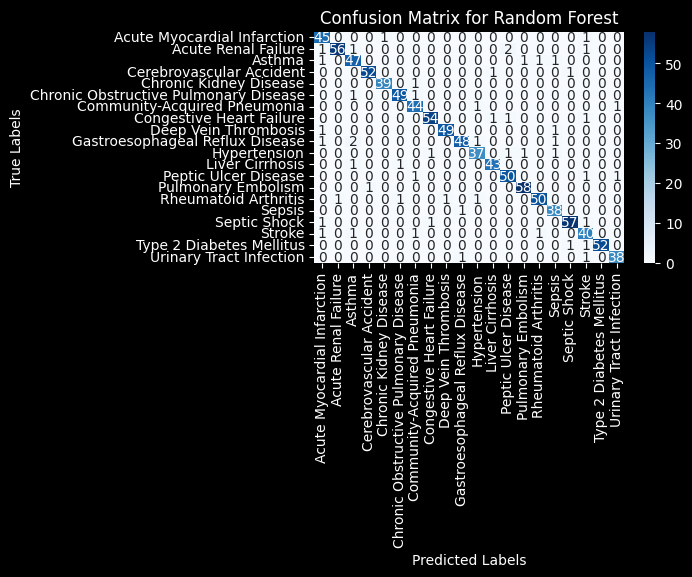

Classification Report for Random Forest:
                                        precision    recall  f1-score   support

          Acute Myocardial Infarction       0.88      0.96      0.92        47
                  Acute Renal Failure       0.98      0.92      0.95        61
                               Asthma       0.89      0.92      0.90        51
             Cerebrovascular Accident       0.98      0.96      0.97        54
               Chronic Kidney Disease       0.97      0.97      0.97        40
Chronic Obstructive Pulmonary Disease       0.96      0.96      0.96        51
         Community-Acquired Pneumonia       0.92      0.96      0.94        46
             Congestive Heart Failure       0.96      0.95      0.96        57
                 Deep Vein Thrombosis       0.98      0.96      0.97        51
      Gastroesophageal Reflux Disease       0.96      0.91      0.93        53
                         Hypertension       0.93      0.90      0.91        41
         

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Model 1: Random Forest
model = models["Random Forest"]
y_pred = model.predict(X_test_tfidf)

# Accuracy and F1 Score for Random Forest
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Random Forest Accuracy: {accuracy:.2f}")
print(f"Random Forest F1 Score: {f1:.2f}")

# Confusion Matrix for Random Forest
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Random Forest")
plt.show()

# Classification Report for Random Forest
print("Classification Report for Random Forest:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))


# # Model 2: Decision Tree
# model = models["Decision Tree"]
# y_pred = model.predict(X_test_tfidf)

# # Accuracy and F1 Score for Decision Tree
# accuracy = accuracy_score(y_test, y_pred)
# f1 = f1_score(y_test, y_pred, average='weighted')

# print(f"Decision Tree Accuracy: {accuracy:.2f}")
# print(f"Decision Tree F1 Score: {f1:.2f}")

# # Confusion Matrix for Decision Tree
# cm = confusion_matrix(y_test, y_pred)
# plt.figure(figsize=(8, 6))
# sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
#             xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
# plt.xlabel("Predicted Labels")
# plt.ylabel("True Labels")
# plt.title("Confusion Matrix for Decision Tree")
# plt.show()

# # Classification Report for Decision Tree
# print("Classification Report for Decision Tree:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))


# # Model 3: Logistic Regression
# model = models["Logistic Regression"]
# y_pred = model.predict(X_test_tfidf)

# # Accuracy and F1 Score for Logistic Regression
# accuracy = accuracy_score(y_test, y_pred)
# f1 = f1_score(y_test, y_pred, average='weighted')

# print(f"Logistic Regression Accuracy: {accuracy:.2f}")
# print(f"Logistic Regression F1 Score: {f1:.2f}")

# # Confusion Matrix for Logistic Regression
# cm = confusion_matrix(y_test, y_pred)
# plt.figure(figsize=(8, 6))
# sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
#             xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
# plt.xlabel("Predicted Labels")
# plt.ylabel("True Labels")
# plt.title("Confusion Matrix for Logistic Regression")
# plt.show()

# # Classification Report for Logistic Regression
# print("Classification Report for Logistic Regression:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))


# # Model 4: Support Vector Machine
# model = models["Support Vector Machine"]
# y_pred = model.predict(X_test_tfidf)

# # Accuracy and F1 Score for Support Vector Machine
# accuracy = accuracy_score(y_test, y_pred)
# f1 = f1_score(y_test, y_pred, average='weighted')

# print(f"Support Vector Machine Accuracy: {accuracy:.2f}")
# print(f"Support Vector Machine F1 Score: {f1:.2f}")

# # Confusion Matrix for Support Vector Machine
# cm = confusion_matrix(y_test, y_pred)
# plt.figure(figsize=(8, 6))
# sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
#             xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
# plt.xlabel("Predicted Labels")
# plt.ylabel("True Labels")
# plt.title("Confusion Matrix for Support Vector Machine")
# plt.show()

# # Classification Report for Support Vector Machine
# print("Classification Report for Support Vector Machine:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))


# # Model 5: K-Nearest Neighbors
# model = models["K-Nearest Neighbors"]
# y_pred = model.predict(X_test_tfidf)

# # Accuracy and F1 Score for K-Nearest Neighbors
# accuracy = accuracy_score(y_test, y_pred)
# f1 = f1_score(y_test, y_pred, average='weighted')

# print(f"K-Nearest Neighbors Accuracy: {accuracy:.2f}")
# print(f"K-Nearest Neighbors F1 Score: {f1:.2f}")

# # Confusion Matrix for K-Nearest Neighbors
# cm = confusion_matrix(y_test, y_pred)
# plt.figure(figsize=(8, 6))
# sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
#             xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
# plt.xlabel("Predicted Labels")
# plt.ylabel("True Labels")
# plt.title("Confusion Matrix for K-Nearest Neighbors")
# plt.show()

# # Classification Report for K-Nearest Neighbors
# print("Classification Report for K-Nearest Neighbors:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))


# # Model 6: Naive Bayes
# model = models["Naive Bayes"]
# y_pred = model.predict(X_test_tfidf)

# # Accuracy and F1 Score for Naive Bayes
# accuracy = accuracy_score(y_test, y_pred)
# f1 = f1_score(y_test, y_pred, average='weighted')

# print(f"Naive Bayes Accuracy: {accuracy:.2f}")
# print(f"Naive Bayes F1 Score: {f1:.2f}")

# # Confusion Matrix for Naive Bayes
# cm = confusion_matrix(y_test, y_pred)
# plt.figure(figsize=(8, 6))
# sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
#             xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
# plt.xlabel("Predicted Labels")
# plt.ylabel("True Labels")
# plt.title("Confusion Matrix for Naive Bayes")
# plt.show()

# # Classification Report for Naive Bayes
# print("Classification Report for Naive Bayes:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))


The **Random Forest** model achieves **95% accuracy**, with high precision, recall, and F1 scores across most diseases. It performs exceptionally well on conditions like **Type 2 Diabetes Mellitus** and **Acute Renal Failure**, while slightly lower performance is seen for **Stroke**, though still strong. Overall, it provides reliable predictions with balanced metrics.

save model

In [ ]:
import pickle
from sklearn.ensemble import RandomForestClassifier

# Train your model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Save the model
with open("random_forest.pkl", "wb") as f:
    pickle.dump(model, f)


ValueError: could not convert string to float: 'yearold female history obesity hypertension presents routine checkup reports increased thirst frequent urination fatigue past months examination patient overweight bmi blood work shows elevated fasting blood glucose levels mgdl hbac levels patient diagnosed type diabetes started metformin'

In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv("/content/clinical_notes_diagnosis_prediction_modified.csv")

# Text and label preprocessing
X = df["Clinical Notes"].astype(str).values
y = df["Diagnosis"].astype(str).values

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
num_classes = len(label_encoder.classes_)

# Tokenization and padding
max_words = 10000  # Vocabulary size
max_len = 200  # Max sequence length

tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(X)
X_seq = tokenizer.texts_to_sequences(X)
X_pad = pad_sequences(X_seq, maxlen=max_len, padding="post", truncating="post")

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.2, random_state=42)

# Convert labels to categorical
y_train_cat = tf.keras.utils.to_categorical(y_train, num_classes=num_classes)
y_test_cat = tf.keras.utils.to_categorical(y_test, num_classes=num_classes)

# Prepare embedding layer
embedding_dim = 128

def build_lstm():
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(max_words, embedding_dim, input_length=max_len),
        tf.keras.layers.LSTM(128, dropout=0.2, recurrent_dropout=0.2),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

def build_bilstm():
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(max_words, embedding_dim, input_length=max_len),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, dropout=0.2, recurrent_dropout=0.2)),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

def build_cnn():
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(max_words, embedding_dim, input_length=max_len),
        tf.keras.layers.Conv1D(128, 5, activation='relu'),
        tf.keras.layers.GlobalMaxPooling1D(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Initialize models
lstm_model = build_lstm()
bilstm_model = build_bilstm()
cnn_model = build_cnn()

# Train models
epochs = 5  # Increase for better results
batch_size = 32

lstm_model.fit(X_train, y_train_cat, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test_cat))
bilstm_model.fit(X_train, y_train_cat, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test_cat))
cnn_model.fit(X_train, y_train_cat, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test_cat))

# Evaluate models
lstm_acc = lstm_model.evaluate(X_test, y_test_cat, verbose=0)[1]
bilstm_acc = bilstm_model.evaluate(X_test, y_test_cat, verbose=0)[1]
cnn_acc = cnn_model.evaluate(X_test, y_test_cat, verbose=0)[1]

print(f"LSTM Accuracy: {lstm_acc:.4f}")
print(f"BiLSTM Accuracy: {bilstm_acc:.4f}")
print(f"CNN Accuracy: {cnn_acc:.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 88s 660ms/step - accuracy: 0.0493 - loss: 2.9982 - val_accuracy: 0.0530 - val_loss: 3.0044
Epoch 2/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 64s 511ms/step - accuracy: 0.0569 - loss: 2.9953 - val_accuracy: 0.0540 - val_loss: 2.9989
Epoch 3/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 62s 499ms/step - accuracy: 0.0508 - loss: 2.9917 - val_accuracy: 0.0540 - val_loss: 2.9972
Epoch 4/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 81s 488ms/step - accuracy: 0.0553 - loss: 2.9956 - val_accuracy: 0.0470 - val_loss: 2.9992
Epoch 5/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 82s 487ms/step - accuracy: 0.0614 - loss: 2.9940 - val_accuracy: 0.0540 - val_loss: 3.0012
Epoch 1/5
 74/125 ━━━━━━━━━━━━━━━━━━━━ 1:03 1s/step - accuracy: 0.1794 - loss: 2.7250

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-20-d95e056f2e10>", line 78, in <cell line: 0>
    bilstm_model.fit(X_train, y_train_cat, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test_cat))
  File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler
    return fn(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 371, in fit
    logs = self.train_function(iterator)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 219, in function
    opt_outputs = multi_step_on_iterator(iterator)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-p

TypeError: object of type 'NoneType' has no len()

In [ ]:
!pip install nlpaug

In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import nlpaug.augmenter.word as naw

# Load dataset
df = pd.read_csv("/content/clinical_notes_diagnosis_prediction_modified.csv")

# Text and label preprocessing
X = df["Clinical Notes"].astype(str).values
y = df["Diagnosis"].astype(str).values

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
num_classes = len(label_encoder.classes_)

# Tokenization and padding
max_words = 10000  # Vocabulary size
max_len = 200  # Max sequence length

tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(X)
X_seq = tokenizer.texts_to_sequences(X)
X_pad = pad_sequences(X_seq, maxlen=max_len, padding="post", truncating="post")

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.2, random_state=42)

# Convert labels to categorical
y_train_cat = tf.keras.utils.to_categorical(y_train, num_classes=num_classes)
y_test_cat = tf.keras.utils.to_categorical(y_test, num_classes=num_classes)

# Prepare embedding layer
embedding_dim = 128

# Data augmentation using synonym replacement
aug = naw.SynonymAug(aug_src='wordnet')
def augment_texts(texts):
    return [aug.augment(text) for text in texts]

# Custom data generator class
class TextDataGenerator(tf.keras.utils.Sequence):
    def __init__(self, texts, labels, batch_size=32, shuffle=True):
        self.texts = texts
        self.labels = labels
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.indexes = np.arange(len(self.texts))
        self.on_epoch_end()

    def __len__(self):
        return int(np.floor(len(self.texts) / self.batch_size))

    def __getitem__(self, index):
        indexes = self.indexes[index * self.batch_size:(index + 1) * self.batch_size]
        batch_texts = [self.texts[k] for k in indexes]
        batch_labels = [self.labels[k] for k in indexes]
        batch_texts = augment_texts(batch_texts)
        return np.array(batch_texts), np.array(batch_labels)

    def on_epoch_end(self):
        if self.shuffle:
            np.random.shuffle(self.indexes)

# Create data generators
train_generator = TextDataGenerator(X_train, y_train_cat)
val_generator = TextDataGenerator(X_test, y_test_cat, shuffle=False)

def build_lstm():
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(max_words, embedding_dim, input_length=max_len),
        tf.keras.layers.LSTM(128, dropout=0.2, recurrent_dropout=0.2),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

def build_bilstm():
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(max_words, embedding_dim, input_length=max_len),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, dropout=0.2, recurrent_dropout=0.2)),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

def build_cnn():
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(max_words, embedding_dim, input_length=max_len),
        tf.keras.layers.Conv1D(128, 5, activation='relu'),
        tf.keras.layers.GlobalMaxPooling1D(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Initialize models
lstm_model = build_lstm()
bilstm_model = build_bilstm()
cnn_model = build_cnn()

# Train models using augmented data
epochs = 5  # Increase for better results
batch_size = 32

lstm_model.fit(train_generator, epochs=epochs, validation_data=val_generator)
bilstm_model.fit(train_generator, epochs=epochs, validation_data=val_generator)
cnn_model.fit(train_generator, epochs=epochs, validation_data=val_generator)

# Evaluate models
lstm_acc = lstm_model.evaluate(X_test, y_test_cat, verbose=0)[1]
bilstm_acc = bilstm_model.evaluate(X_test, y_test_cat, verbose=0)[1]
cnn_acc = cnn_model.evaluate(X_test, y_test_cat, verbose=0)[1]

print(f"LSTM Accuracy: {lstm_acc:.4f}")
print(f"BiLSTM Accuracy: {bilstm_acc:.4f}")
print(f"CNN Accuracy: {cnn_acc:.4f}")


In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)

In [ ]:
# history = model.fit(datagen.flow(x_train,y_train, batch_size = 32) ,epochs = 12 , validation_data = datagen.flow(x_val, y_val) ,callbacks = [learning_rate_reduction])

In [ ]:
# Train models using direct dataset inputs (if no augmentation)
epochs = 5  # Adjust as needed
batch_size = 32

history_lstm = lstm_model.fit(X_train, y_train_cat, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test_cat))
history_bilstm = bilstm_model.fit(X_train, y_train_cat, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test_cat))
history_cnn = cnn_model.fit(X_train, y_train_cat, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test_cat))

# Save training history
lstm_history = history_lstm.history
bilstm_history = history_bilstm.history
cnn_history = history_cnn.history

# Print final accuracy
print(f"LSTM Final Accuracy: {lstm_history['accuracy'][-1]:.4f}")
print(f"BiLSTM Final Accuracy: {bilstm_history['accuracy'][-1]:.4f}")
print(f"CNN Final Accuracy: {cnn_history['accuracy'][-1]:.4f}")


In [ ]:
# Evaluate LSTM model
lstm_loss, lstm_acc = lstm_model.evaluate(X_test, y_test_cat, verbose=0)
print(f"LSTM Model - Loss: {lstm_loss:.4f}, Accuracy: {lstm_acc*100:.2f}%")

# Evaluate BiLSTM model
bilstm_loss, bilstm_acc = bilstm_model.evaluate(X_test, y_test_cat, verbose=0)
print(f"BiLSTM Model - Loss: {bilstm_loss:.4f}, Accuracy: {bilstm_acc*100:.2f}%")

# Evaluate CNN model
cnn_loss, cnn_acc = cnn_model.evaluate(X_test, y_test_cat, verbose=0)
print(f"CNN Model - Loss: {cnn_loss:.4f}, Accuracy: {cnn_acc*100:.2f}%")


### Analysis after DL Model Training

In [ ]:
import matplotlib.pyplot as plt

# Function to plot accuracy & loss
def plot_history(history, model_name):
    epochs = range(len(history['accuracy']))
    fig, ax = plt.subplots(1, 2, figsize=(20, 5))

    # Plot Accuracy
    ax[0].plot(epochs, history['accuracy'], 'go-', label='Training Accuracy')
    ax[0].plot(epochs, history['val_accuracy'], 'ro-', label='Validation Accuracy')
    ax[0].set_title(f'{model_name} - Training & Validation Accuracy')
    ax[0].legend()
    ax[0].set_xlabel("Epochs")
    ax[0].set_ylabel("Accuracy")

    # Plot Loss
    ax[1].plot(epochs, history['loss'], 'g-o', label='Training Loss')
    ax[1].plot(epochs, history['val_loss'], 'r-o', label='Validation Loss')
    ax[1].set_title(f'{model_name} - Training & Validation Loss')
    ax[1].legend()
    ax[1].set_xlabel("Epochs")
    ax[1].set_ylabel("Loss")

    plt.show()

# Plot for each model
plot_history(lstm_history, "LSTM")
plot_history(bilstm_history, "BiLSTM")
plot_history(cnn_history, "CNN")


#### Predictions of DL Model

In [ ]:
import numpy as np

# Get predictions for LSTM model
lstm_predictions = np.argmax(lstm_model.predict(X_test), axis=1)
print("LSTM Predictions:", lstm_predictions[:15])

# Get predictions for BiLSTM model
bilstm_predictions = np.argmax(bilstm_model.predict(X_test), axis=1)
print("BiLSTM Predictions:", bilstm_predictions[:15])

# Get predictions for CNN model
cnn_predictions = np.argmax(cnn_model.predict(X_test), axis=1)
print("CNN Predictions:", cnn_predictions[:15])


prediction system of DL model

In [ ]:
!pip install PyPDF2

In [ ]:
import os
print(os.listdir())


In [ ]:
lstm_model.save("lstm_model.h5")
bilstm_model.save("bilstm_model.h5")
cnn_model.save("cnn_model.h5")


In [ ]:
from google.colab import files
uploaded = files.upload()


In [ ]:
import pickle
from tensorflow.keras.preprocessing.text import Tokenizer

# Load your dataset
import pandas as pd
df = pd.read_csv("clinical_notes_diagnosis_prediction_modified.csv")  # Adjust filename if needed

# Fit tokenizer on text data
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(df["text_column"])  # Replace "text_column" with actual text column name

# Save the tokenizer
with open("tokenizer.pkl", "wb") as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

print("Tokenizer saved successfully.")


In [ ]:
import pickle
from tensorflow.keras.preprocessing.text import Tokenizer
import pandas as pd

# Load your dataset
df = pd.read_csv("clinical_notes_diagnosis_prediction_modified.csv")  # Adjust filename if needed

# Check column names
print(df.columns)

# Fit tokenizer on the actual text data column (replace 'text_column' with the correct column name)
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(df["Clinical Notes"])  # Replace with the correct column name

# Save the tokenizer to a pickle file
with open("tokenizer.pkl", "wb") as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

print("Tokenizer saved successfully.")


In [ ]:
from sklearn.preprocessing import LabelEncoder
import pickle

# Assuming you have a dataframe `df` with the target column `Diagnosis`:
y = df["Diagnosis"].astype(str).values  # The diagnosis labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Save the label encoder to a file
with open("label_encoder.pkl", "wb") as handle:
    pickle.dump(label_encoder, handle, protocol=pickle.HIGHEST_PROTOCOL)

print("LabelEncoder saved successfully.")


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from pdf2image import convert_from_path
import pytesseract
import re
from PyPDF2 import PdfReader

# Load trained models
lstm_model = tf.keras.models.load_model("lstm_model.h5")
bilstm_model = tf.keras.models.load_model("bilstm_model.h5")
cnn_model = tf.keras.models.load_model("cnn_model.h5")

# Load tokenizer
with open("tokenizer.pkl", "rb") as handle:
    tokenizer = pickle.load(handle)

# Function to preprocess text
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return text.strip()

# Function to extract text from PDF
def extract_text_from_pdf(pdf_path):
    text = ""
    pdf_reader = PdfReader(pdf_path)
    for page in pdf_reader.pages:
        text += page.extract_text() + " "
    return text

# Function to predict disease
def predict_disease(text):
    processed_text = preprocess_text(text)
    sequence = tokenizer.texts_to_sequences([processed_text])
    padded_sequence = pad_sequences(sequence, maxlen=100)

    lstm_pred = np.argmax(lstm_model.predict(padded_sequence), axis=1)[0]
    bilstm_pred = np.argmax(bilstm_model.predict(padded_sequence), axis=1)[0]
    cnn_pred = np.argmax(cnn_model.predict(padded_sequence), axis=1)[0]

    return {
        "LSTM Prediction": lstm_pred,
        "BiLSTM Prediction": bilstm_pred,
        "CNN Prediction": cnn_pred
    }

# User input
file_path = input("Enter file path (text or PDF): ")

if file_path.endswith(".pdf"):
    text_data = extract_text_from_pdf(file_path)
else:
    with open(file_path, "r", encoding="utf-8") as f:
        text_data = f.read()

predictions = predict_disease(text_data)
print("\nPrediction Results:")
for model, result in predictions.items():
    print(f"{model}: {result}")

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pickle
import re
from PyPDF2 import PdfReader
import os

# Load trained models
lstm_model = tf.keras.models.load_model("lstm_model.h5")
bilstm_model = tf.keras.models.load_model("bilstm_model.h5")
cnn_model = tf.keras.models.load_model("cnn_model.h5")

# Load tokenizer
with open("tokenizer.pkl", "rb") as handle:
    tokenizer = pickle.load(handle)

# Function to preprocess text
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return text.strip()

# Function to extract text from PDF
def extract_text_from_pdf(pdf_path):
    text = ""
    pdf_reader = PdfReader(pdf_path)
    for page in pdf_reader.pages:
        text += page.extract_text() + " "
    return text

# Function to predict disease
def predict_disease(text):
    processed_text = preprocess_text(text)
    sequence = tokenizer.texts_to_sequences([processed_text])
    padded_sequence = pad_sequences(sequence, maxlen=100)

    lstm_pred = np.argmax(lstm_model.predict(padded_sequence), axis=1)[0]
    bilstm_pred = np.argmax(bilstm_model.predict(padded_sequence), axis=1)[0]
    cnn_pred = np.argmax(cnn_model.predict(padded_sequence), axis=1)[0]

    return {
        "LSTM Prediction": lstm_pred,
        "BiLSTM Prediction": bilstm_pred,
        "CNN Prediction": cnn_pred
    }

# User input
file_path = input("Enter file path (text or PDF): ")

# Check if the file exists
if not os.path.exists(file_path):
    print("The file does not exist. Please check the path and try again.")
else:
    # Process PDF file
    if file_path.lower().endswith(".pdf"):
        text_data = extract_text_from_pdf(file_path)
    # Process text file
    elif file_path.lower().endswith(".txt"):
        with open(file_path, "r", encoding="utf-8") as f:
            text_data = f.read()
    else:
        print("Please provide a valid text or PDF file.")
        exit()

    # Run prediction
    predictions = predict_disease(text_data)
    print("\nPrediction Results:")
    for model, result in predictions.items():
        print(f"{model}: {result}")


In [ ]:
# Assuming label_encoder is already loaded or available
# Get the class labels from the LabelEncoder
class_labels = label_encoder.classes_

# Function to convert prediction index to class label
def index_to_class(prediction_index):
    return class_labels[prediction_index]

# Function to predict disease with class labels
def predict_disease_with_labels(text):
    processed_text = preprocess_text(text)
    sequence = tokenizer.texts_to_sequences([processed_text])
    padded_sequence = pad_sequences(sequence, maxlen=100)

    lstm_pred = np.argmax(lstm_model.predict(padded_sequence), axis=1)[0]
    bilstm_pred = np.argmax(bilstm_model.predict(padded_sequence), axis=1)[0]
    cnn_pred = np.argmax(cnn_model.predict(padded_sequence), axis=1)[0]

    return {
        "LSTM Prediction": index_to_class(lstm_pred),
        "BiLSTM Prediction": index_to_class(bilstm_pred),
        "CNN Prediction": index_to_class(cnn_pred)
    }

# Use this updated function to get predictions with class labels
file_path = input("Enter file path (text or PDF): ")

# Check if the file exists
if not os.path.exists(file_path):
    print("The file does not exist. Please check the path and try again.")
else:
    # Process PDF file
    if file_path.lower().endswith(".pdf"):
        text_data = extract_text_from_pdf(file_path)
    # Process text file
    elif file_path.lower().endswith(".txt"):
        with open(file_path, "r", encoding="utf-8") as f:
            text_data = f.read()
    else:
        print("Please provide a valid text or PDF file.")
        exit()

    # Run prediction
    predictions = predict_disease_with_labels(text_data)
    print("\nPrediction Results:")
    for model, result in predictions.items():
        print(f"{model}: {result}")


In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
import re
import pickle
from PyPDF2 import PdfReader

# Load trained models
lstm_model = tf.keras.models.load_model("lstm_model.h5")
bilstm_model = tf.keras.models.load_model("bilstm_model.h5")
cnn_model = tf.keras.models.load_model("cnn_model.h5")

# Load tokenizer
with open("tokenizer.pkl", "rb") as handle:
    tokenizer = pickle.load(handle)

# Load LabelEncoder
with open("label_encoder.pkl", "rb") as handle:
    label_encoder = pickle.load(handle)

# Function to preprocess text
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return text.strip()

# Function to extract text from PDF
def extract_text_from_pdf(pdf_path):
    text = ""
    pdf_reader = PdfReader(pdf_path)
    for page in pdf_reader.pages:
        text += page.extract_text() + " "
    return text

# Function to predict disease with class labels
def index_to_class(prediction_index):
    return label_encoder.classes_[prediction_index]

# Function to predict disease with class labels
def predict_disease_with_labels(text):
    processed_text = preprocess_text(text)
    sequence = tokenizer.texts_to_sequences([processed_text])
    padded_sequence = pad_sequences(sequence, maxlen=100)

    lstm_pred = np.argmax(lstm_model.predict(padded_sequence), axis=1)[0]
    bilstm_pred = np.argmax(bilstm_model.predict(padded_sequence), axis=1)[0]
    cnn_pred = np.argmax(cnn_model.predict(padded_sequence), axis=1)[0]

    return {
        "LSTM Prediction": index_to_class(lstm_pred),
        "BiLSTM Prediction": index_to_class(bilstm_pred),
        "CNN Prediction": index_to_class(cnn_pred)
    }

# Ask user for input file
print("Please choose an input format:")
print("1. Text file")
print("2. PDF file")
choice = input("Enter your choice (1/2): ").strip()

if choice == "1":
    # Take input from a text file
    file_path = input("Enter the text file path: ").strip()
    if os.path.exists(file_path):
        with open(file_path, "r", encoding="utf-8") as f:
            text_data = f.read()
    else:
        print("File not found. Please check the file path.")
        exit()
elif choice == "2":
    # Take input from a PDF file
    file_path = input("Enter the PDF file path: ").strip()
    if os.path.exists(file_path):
        text_data = extract_text_from_pdf(file_path)
    else:
        print("File not found. Please check the file path.")
        exit()
else:
    print("Invalid choice. Please choose either 1 or 2.")
    exit()

# Run prediction
predictions = predict_disease_with_labels(text_data)

# Output predictions
print("\nPrediction Results:")
for model, result in predictions.items():
    print(f"{model}: {result}")


In [ ]:
# A 55-year-old male with a history of heavy alcohol use presents with jaundice, abdominal pain, and swelling. Physical examination reveals hepatomegaly and ascites. Liver function tests show elevated ALT, AST, and bilirubin levels. An ultrasound of the liver shows signs of cirrhosis. The patient is advised to stop drinking alcohol and referred for liver transplantation evaluation.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
import re
import pickle
from PyPDF2 import PdfReader

# Load trained models
lstm_model = tf.keras.models.load_model("lstm_model.h5")
bilstm_model = tf.keras.models.load_model("bilstm_model.h5")
cnn_model = tf.keras.models.load_model("cnn_model.h5")

# Load tokenizer
with open("tokenizer.pkl", "rb") as handle:
    tokenizer = pickle.load(handle)

# Load LabelEncoder
with open("label_encoder.pkl", "rb") as handle:
    label_encoder = pickle.load(handle)

# Function to preprocess text
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return text.strip()

# Function to extract text from PDF
def extract_text_from_pdf(pdf_content):
    text = ""
    pdf_reader = PdfReader(pdf_content)
    for page in pdf_reader.pages:
        text += page.extract_text() + " "
    return text

# Function to predict disease with class labels
def index_to_class(prediction_index):
    return label_encoder.classes_[prediction_index]

# Function to predict disease with class labels
def predict_disease_with_labels(text):
    processed_text = preprocess_text(text)
    sequence = tokenizer.texts_to_sequences([processed_text])
    padded_sequence = pad_sequences(sequence, maxlen=100)

    lstm_pred = np.argmax(lstm_model.predict(padded_sequence), axis=1)[0]
    bilstm_pred = np.argmax(bilstm_model.predict(padded_sequence), axis=1)[0]
    cnn_pred = np.argmax(cnn_model.predict(padded_sequence), axis=1)[0]

    return {
        "LSTM Prediction": index_to_class(lstm_pred),
        "BiLSTM Prediction": index_to_class(bilstm_pred),
        "CNN Prediction": index_to_class(cnn_pred)
    }

# Direct user input (for text or pasted content)
print("Please enter the text or PDF content below:")

# Option for taking user input directly
user_input_choice = input("Would you like to enter the text directly or paste the content of a PDF? (text/pdf): ").strip().lower()

if user_input_choice == 'text':
    # User enters text directly
    user_text = input("Enter the text for prediction: ").strip()
    predictions = predict_disease_with_labels(user_text)

elif user_input_choice == 'pdf':
    # User pastes PDF content directly (simulating PDF input)
    pdf_content = input("Paste the content of the PDF: ").strip()
    predictions = predict_disease_with_labels(pdf_content)

else:
    print("Invalid option selected.")
    exit()

# Output predictions
print("\nPrediction Results:")
for model, result in predictions.items():
    print(f"{model}: {result}")


In [ ]:
!apt-get install -y poppler-utils


In [ ]:
!apt-get install -y tesseract-ocr


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
import re
import pickle
from PyPDF2 import PdfReader
from google.colab import files
from pdf2image import convert_from_path
from PIL import Image
import pytesseract

# Load trained models
lstm_model = tf.keras.models.load_model("lstm_model.h5")
bilstm_model = tf.keras.models.load_model("bilstm_model.h5")
cnn_model = tf.keras.models.load_model("cnn_model.h5")

# Load tokenizer
with open("tokenizer.pkl", "rb") as handle:
    tokenizer = pickle.load(handle)

# Load LabelEncoder
with open("label_encoder.pkl", "rb") as handle:
    label_encoder = pickle.load(handle)

# Function to preprocess text
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return text.strip()

# Function to extract text from PDF
def extract_text_from_pdf(pdf_path):
    text = ""
    pdf_reader = PdfReader(pdf_path)
    for page in pdf_reader.pages:
        text += page.extract_text() + " "
    return text

# Function to extract text from image using OCR
def extract_text_from_image(image):
    return pytesseract.image_to_string(image)

# Function to predict disease with class labels
def index_to_class(prediction_index):
    return label_encoder.classes_[prediction_index]

# Function to predict disease with class labels
def predict_disease_with_labels(text):
    processed_text = preprocess_text(text)
    sequence = tokenizer.texts_to_sequences([processed_text])
    padded_sequence = pad_sequences(sequence, maxlen=100)

    lstm_pred = np.argmax(lstm_model.predict(padded_sequence), axis=1)[0]
    bilstm_pred = np.argmax(bilstm_model.predict(padded_sequence), axis=1)[0]
    cnn_pred = np.argmax(cnn_model.predict(padded_sequence), axis=1)[0]

    return {
        "LSTM Prediction": index_to_class(lstm_pred),
        "BiLSTM Prediction": index_to_class(bilstm_pred),
        "CNN Prediction": index_to_class(cnn_pred)
    }

# Step 1: Upload the PDF or Image File
print("Please upload the CBC report (PDF or image):")
uploaded = files.upload()

# Get the file path of the uploaded file
uploaded_file_path = list(uploaded.keys())[0]

# Step 2: Handle PDF to Image Conversion (if the uploaded file is a PDF)
if uploaded_file_path.endswith('.pdf'):
    images = convert_from_path(uploaded_file_path)
    # Convert the first page of PDF to text using OCR
    pdf_text = ""
    for image in images:
        pdf_text += extract_text_from_image(image)
    text_data = pdf_text
elif uploaded_file_path.endswith('.jpg') or uploaded_file_path.endswith('.png'):
    # If it's an image, load it directly
    image = Image.open(uploaded_file_path)
    text_data = extract_text_from_image(image)
else:
    print("Invalid file format. Please upload a PDF or image file.")
    exit()

# Run prediction
predictions = predict_disease_with_labels(text_data)

# Output predictions
print("\nPrediction Results:")
for model, result in predictions.items():
    print(f"{model}: {result}")


In [ ]:
# Install necessary dependencies
!apt-get install -y tesseract-ocr poppler-utils

import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
import re
import pickle
from PyPDF2 import PdfReader
from google.colab import files
from pdf2image import convert_from_path
from PIL import Image
import pytesseract

# Load trained models
lstm_model = tf.keras.models.load_model("lstm_model.h5")
bilstm_model = tf.keras.models.load_model("bilstm_model.h5")
cnn_model = tf.keras.models.load_model("cnn_model.h5")

# Load tokenizer and LabelEncoder
with open("tokenizer.pkl", "rb") as handle:
    tokenizer = pickle.load(handle)

with open("label_encoder.pkl", "rb") as handle:
    label_encoder = pickle.load(handle)

# Function to preprocess text
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Remove special characters
    return text.strip()

# Function to extract text from PDF
def extract_text_from_pdf(pdf_path):
    text = ""
    pdf_reader = PdfReader(pdf_path)
    for page in pdf_reader.pages:
        text += page.extract_text() + " "
    return text

# Function to extract text from image using OCR
def extract_text_from_image(image):
    return pytesseract.image_to_string(image)

# Function to convert prediction index to class label
def index_to_class(prediction_index):
    return label_encoder.classes_[prediction_index]

# Function to predict disease with class labels
def predict_disease_with_labels(text):
    processed_text = preprocess_text(text)
    sequence = tokenizer.texts_to_sequences([processed_text])
    padded_sequence = pad_sequences(sequence, maxlen=100)

    # Predict using all models
    lstm_pred = np.argmax(lstm_model.predict(padded_sequence), axis=1)[0]
    bilstm_pred = np.argmax(bilstm_model.predict(padded_sequence), axis=1)[0]
    cnn_pred = np.argmax(cnn_model.predict(padded_sequence), axis=1)[0]

    return {
        "LSTM Prediction": index_to_class(lstm_pred),
        "BiLSTM Prediction": index_to_class(bilstm_pred),
        "CNN Prediction": index_to_class(cnn_pred)
    }

# Upload the PDF or Image file
print("Please upload the CBC report (PDF or image):")
uploaded = files.upload()

# Get the file path of the uploaded file
uploaded_file_path = list(uploaded.keys())[0]

# Step 2: Handle PDF to Image Conversion (if the uploaded file is a PDF)
if uploaded_file_path.endswith('.pdf'):
    images = convert_from_path(uploaded_file_path)
    # Convert the first page of PDF to text using OCR
    pdf_text = ""
    for image in images:
        pdf_text += extract_text_from_image(image)
    text_data = pdf_text
elif uploaded_file_path.endswith('.jpg') or uploaded_file_path.endswith('.png'):
    # If it's an image, load it directly
    image = Image.open(uploaded_file_path)
    text_data = extract_text_from_image(image)
else:
    print("Invalid file format. Please upload a PDF or image file.")
    exit()

# Run prediction
predictions = predict_disease_with_labels(text_data)

# Output predictions
print("\nPrediction Results:")
for model, result in predictions.items():
    print(f"{model}: {result}")


evaluation DL model

In [ ]:
from sklearn.metrics import classification_report

# Convert one-hot encoded y_test back to integer labels
y_test_labels = np.argmax(y_test_cat, axis=1)

# Get the actual class names from the label encoder
class_names = label_encoder.classes_

# LSTM Model Classification Report
lstm_predictions = np.argmax(lstm_model.predict(X_test), axis=1)
print("LSTM Model Classification Report:\n")
print(classification_report(y_test_labels, lstm_predictions, target_names=class_names))

# BiLSTM Model Classification Report
bilstm_predictions = np.argmax(bilstm_model.predict(X_test), axis=1)
print("\nBiLSTM Model Classification Report:\n")
print(classification_report(y_test_labels, bilstm_predictions, target_names=class_names))

# CNN Model Classification Report
cnn_predictions = np.argmax(cnn_model.predict(X_test), axis=1)
print("\nCNN Model Classification Report:\n")
print(classification_report(y_test_labels, cnn_predictions, target_names=class_names))



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Convert one-hot encoded y_test back to integer labels
y_test_labels = np.argmax(y_test_cat, axis=1)

# Get class names from the label encoder
class_names = label_encoder.classes_

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"{model_name} - Confusion Matrix")
    plt.show()

# LSTM Confusion Matrix
lstm_predictions = np.argmax(lstm_model.predict(X_test), axis=1)
plot_confusion_matrix(y_test_labels, lstm_predictions, "LSTM")

# BiLSTM Confusion Matrix
bilstm_predictions = np.argmax(bilstm_model.predict(X_test), axis=1)
plot_confusion_matrix(y_test_labels, bilstm_predictions, "BiLSTM")

# CNN Confusion Matrix
cnn_predictions = np.argmax(cnn_model.predict(X_test), axis=1)
plot_confusion_matrix(y_test_labels, cnn_predictions, "CNN")


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Convert one-hot encoded y_test back to integer labels
y_test_labels = np.argmax(y_test_cat, axis=1)

# Get class names from the label encoder
class_names = label_encoder.classes_

# Function to create and display confusion matrix as DataFrame
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)

    # Convert to pandas DataFrame with class names
    cm_df = pd.DataFrame(cm, index=class_names, columns=class_names)

    # Plot confusion matrix heatmap
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm_df, annot=True, fmt='d', cmap="Blues")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"{model_name} - Confusion Matrix")
    plt.show()

    return cm_df  # Return DataFrame if needed

# Generate confusion matrices for each model
lstm_predictions = np.argmax(lstm_model.predict(X_test), axis=1)
lstm_cm_df = plot_confusion_matrix(y_test_labels, lstm_predictions, "LSTM")

bilstm_predictions = np.argmax(bilstm_model.predict(X_test), axis=1)
bilstm_cm_df = plot_confusion_matrix(y_test_labels, bilstm_predictions, "BiLSTM")

cnn_predictions = np.argmax(cnn_model.predict(X_test), axis=1)
cnn_cm_df = plot_confusion_matrix(y_test_labels, cnn_predictions, "CNN")

# Print confusion matrices as DataFrames
print("LSTM Confusion Matrix:\n", lstm_cm_df)
print("\nBiLSTM Confusion Matrix:\n", bilstm_cm_df)
print("\nCNN Confusion Matrix:\n", cnn_cm_df)


In [ ]:
!pip install pypdf2

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pickle
import PyPDF2
from google.colab import files
import shutil

# Ensure models directory exists
model_dir = "models/"
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

def load_models():
    """Load trained LSTM, BiLSTM, and CNN models. If missing, ask for upload."""
    models = {}
    missing_files = []

    for model_name in ["lstm_model.h5", "bilstm_model.h5", "cnn_model.h5"]:
        model_path = os.path.join(model_dir, model_name)
        if os.path.exists(model_path):
            models[model_name.replace(".h5", "")] = tf.keras.models.load_model(model_path)
            print(f"✅ Loaded {model_name} successfully.")
        else:
            print(f"⚠️ Warning: {model_name} not found. Skipping...")
            missing_files.append(model_name)

    if missing_files:
        print("❌ Some models are missing! Please upload them now.")
        uploaded = files.upload()
        for file_name in missing_files:
            if file_name in uploaded:
                shutil.move(file_name, os.path.join(model_dir, file_name))
                models[file_name.replace(".h5", "")] = tf.keras.models.load_model(os.path.join(model_dir, file_name))
                print(f"✅ {file_name} uploaded and loaded successfully!")

    if not models:
        raise FileNotFoundError("❌ No models found! Please upload .h5 files.")

    return models

def load_tokenizer():
    """Load the tokenizer used during training. If missing, ask for upload."""
    tokenizer_path = os.path.join(model_dir, "tokenizer.pkl")

    if not os.path.exists(tokenizer_path):
        print("❌ Tokenizer file not found! Please upload 'tokenizer.pkl'.")
        uploaded = files.upload()
        if "tokenizer.pkl" in uploaded:
            shutil.move("tokenizer.pkl", tokenizer_path)
            print("✅ Tokenizer uploaded successfully!")

    with open(tokenizer_path, "rb") as f:
        tokenizer = pickle.load(f)
    return tokenizer

def preprocess_text(text, tokenizer, max_length=100):
    """Tokenize and pad the input text for model prediction."""
    sequences = tokenizer.texts_to_sequences([text])
    padded_seq = pad_sequences(sequences, maxlen=max_length, padding='post')
    return padded_seq

def predict_diagnosis(text, tokenizer, models, label_mapping=None):
    """Predict diagnosis using all three models and return results."""
    processed_text = preprocess_text(text, tokenizer)

    predictions = {}
    for model_name, model in models.items():
        pred = np.argmax(model.predict(processed_text), axis=1)[0]
        predictions[model_name.upper()] = label_mapping.get(pred, "Unknown") if label_mapping else pred

    return predictions

def extract_text_from_pdf(pdf_path):
    """Extract text from a PDF file."""
    text = ""
    with open(pdf_path, "rb") as f:
        reader = PyPDF2.PdfReader(f)
        for page in reader.pages:
            text += page.extract_text() + "\n"
    return text.strip()

def get_user_input():
    """Get clinical notes input from the user (text input or file upload)."""
    print("📂 Upload a PDF or text file (or type clinical notes manually):")
    uploaded_files = files.upload()

    for filename in uploaded_files:
        file_path = os.path.join("/content", filename)
        if filename.endswith(".pdf"):
            text = extract_text_from_pdf(file_path)
        elif filename.endswith(".txt"):
            with open(file_path, "r") as f:
                text = f.read()
        else:
            print("❌ Unsupported file type. Please upload a .pdf or .txt file.")
            return None

        print(f"✅ Successfully read file: {filename}")
        return text.strip()

    return None

if __name__ == "__main__":
    models = load_models()
    tokenizer = load_tokenizer()

    label_mapping = {
        0: "Class A",
        1: "Class B",
        2: "Class C"  # Replace with actual labels
    }

    while True:
        user_input = input("🔹 Enter clinical notes (or type 'upload' to upload a file, or 'exit' to quit): ").strip()

        if user_input.lower() == "exit":
            break
        elif user_input.lower() == "upload":
            user_text = get_user_input()
            if not user_text:
                continue
        else:
            user_text = user_input

        predictions = predict_diagnosis(user_text, tokenizer, models, label_mapping)
        print(f"📌 Predictions: {predictions}\n")


prediction system

In [ ]:
!pip install pdf2image


In [ ]:
!pip install pytesseract


In [ ]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display
from pdf2image import convert_from_path
import pytesseract
import re
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from google.colab import files
from PIL import Image
import joblib  # To save and load trained models

# Upload medical history file (PDF or text)
print("Upload Medical History (PDF or TXT):")
uploaded = files.upload()
uploaded_file_path = list(uploaded.keys())[0]

# Convert PDF to text
def extract_text(file_path):
    if file_path.endswith('.pdf'):
        images = convert_from_path(file_path)
        text = ""
        for img in images:
            text += pytesseract.image_to_string(img, config="--oem 3 --psm 6")
    else:  # If it's a text file
        with open(file_path, 'r', encoding='utf-8') as f:
            text = f.read()
    return text

# Preprocess text
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # Remove special characters
    text = ' '.join(text.split())  # Remove extra spaces
    return text

# Extract and process text
raw_text = extract_text(uploaded_file_path)
clean_text = preprocess_text(raw_text)

# Load trained models and vectorizer
vectorizer = joblib.load("tfidf_vectorizer.pkl")  # Load saved TF-IDF vectorizer
X_input = vectorizer.transform([clean_text])  # Convert input text to TF-IDF

models = {
    "Random Forest": joblib.load("random_forest_model.pkl"),
    "Decision Tree": joblib.load("decision_tree_model.pkl"),
    "Logistic Regression": joblib.load("logistic_regression_model.pkl"),
    "Support Vector Machine": joblib.load("svm_model.pkl"),
    "K-Nearest Neighbors": joblib.load("knn_model.pkl"),
    "Naive Bayes": joblib.load("naive_bayes_model.pkl")
}

# Make predictions using all models
predictions = {name: model.predict(X_input)[0] for name, model in models.items()}

# Display predictions
output = widgets.Output()
with output:
    output.clear_output()
    print("Predictions from different models:")
    for model, prediction in predictions.items():
        print(f"{model}: {prediction}")

display(output)


In [ ]:
import pandas as pd
import numpy as np
import pytesseract
from pdf2image import convert_from_path
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import joblib
import re

def extract_text_from_pdf(pdf_path):
    """Extract text from a PDF file using OCR."""
    images = convert_from_path(pdf_path)
    text = " ".join([pytesseract.image_to_string(img) for img in images])
    return text

def preprocess_text(text):
    """Preprocess text by removing special characters and extra spaces."""
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return text.lower().strip()

def train_model(csv_path):
    """Train a model using the dataset."""
    data = pd.read_csv(csv_path)
    label_encoder = LabelEncoder()
    data['Diagnosis'] = label_encoder.fit_transform(data['Diagnosis'])

    X_train, X_test, y_train, y_test = train_test_split(data['Clinical Notes'], data['Diagnosis'], test_size=0.2, random_state=42)

    tfidf = TfidfVectorizer(max_features=5000)
    X_train_tfidf = tfidf.fit_transform(X_train).toarray()
    X_test_tfidf = tfidf.transform(X_test).toarray()

    model = RandomForestClassifier(random_state=42)
    model.fit(X_train_tfidf, y_train)

    joblib.dump(model, 'trained_model.pkl')
    joblib.dump(tfidf, 'tfidf_vectorizer.pkl')
    joblib.dump(label_encoder, 'label_encoder.pkl')

    print("Model trained and saved successfully!")

def predict_diagnosis(input_text):
    """Predict diagnosis based on input text."""
    model = joblib.load('trained_model.pkl')
    tfidf = joblib.load('tfidf_vectorizer.pkl')
    label_encoder = joblib.load('label_encoder.pkl')

    processed_text = preprocess_text(input_text)
    input_tfidf = tfidf.transform([processed_text]).toarray()
    prediction = model.predict(input_tfidf)

    return label_encoder.inverse_transform(prediction)[0]

# Example usage
if __name__ == "__main__":
    user_input = input("Enter medical history text or provide a PDF path: ")
    if user_input.endswith('.pdf'):
        extracted_text = extract_text_from_pdf(user_input)
    else:
        extracted_text = user_input

    diagnosis = predict_diagnosis(extracted_text)
    print(f"Predicted Diagnosis: {diagnosis}")


### BERT (Bidirectional Encoder Representations from Transformers) Model

In [ ]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer, BertForSequenceClassification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Step 1: Load Dataset
df = pd.read_csv("modified_clinical_notes_dataset.csv")  # Ensure dataset is uploaded in Colab

# Step 2: Preprocess Labels
label_encoder = LabelEncoder()
df['Diagnosis'] = label_encoder.fit_transform(df['Diagnosis'])
num_classes = len(label_encoder.classes_)

# Step 3: Load BERT Tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# Step 4: Create Custom Dataset Class
class ClinicalNotesDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=512):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        encoding = self.tokenizer(
            self.texts[idx],
            padding='max_length',
            truncation=True,
            max_length=self.max_length,
            return_tensors='pt'
        )
        return {
            'input_ids': encoding['input_ids'].squeeze(0),
            'attention_mask': encoding['attention_mask'].squeeze(0),
            'labels': torch.tensor(self.labels[idx], dtype=torch.long)
        }

# Step 5: Split Data into Train & Test
X_train, X_test, y_train, y_test = train_test_split(df['Clinical Notes'], df['Diagnosis'], test_size=0.2, random_state=42)

# Step 6: Create DataLoader
train_dataset = ClinicalNotesDataset(X_train.tolist(), y_train.tolist(), tokenizer)
test_dataset = ClinicalNotesDataset(X_test.tolist(), y_test.tolist(), tokenizer)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

# Step 7: Load BERT Model
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=num_classes)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Step 8: Define Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=2e-5)

# Step 9: Training Loop
epochs = 3
for epoch in range(epochs):
    model.train()
    total_loss, correct = 0, 0
    for batch in train_loader:
        input_ids, attention_mask, labels = batch['input_ids'].to(device), batch['attention_mask'].to(device), batch['labels'].to(device)
        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask)
        loss = criterion(outputs.logits, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss/len(train_loader):.4f}")

# Step 10: Evaluation
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for batch in test_loader:
        input_ids, attention_mask, labels = batch['input_ids'].to(device), batch['attention_mask'].to(device), batch['labels'].to(device)
        outputs = model(input_ids, attention_mask=attention_mask)
        predictions = torch.argmax(outputs.logits, dim=1)
        correct += (predictions == labels).sum().item()
        total += labels.size(0)
print(f"Test Accuracy: {correct / total:.4f}")

# Step 11: Save Model
torch.save(model.state_dict(), "bert_clinical_model.pth")
print("Model saved successfully!")


In [ ]:
import numpy as np
import pandas as pd
import re
import string
import nltk

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# -------------------------------
# Download NLTK Resources
# -------------------------------
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# -------------------------------
# Load Dataset
# -------------------------------
df = pd.read_csv("/content/clinical_notes_diagnosis_prediction_modified.csv")

# -------------------------------
# Text Preprocessing
# -------------------------------
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    text = text.lower()

    text = re.sub(rf"[{re.escape(string.punctuation)}]", " ", text)  # Replace all punctuation with space
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra whitespace
    tokens = word_tokenize(text)
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(w) for w in tokens if w not in stopwords.words('english')]
    return " ".join(tokens)

df['clean_text'] = df['Clinical Notes'].astype(str).apply(preprocess)

# -------------------------------
# TF-IDF Vectorization
# -------------------------------
vectorizer = TfidfVectorizer(
    min_df=2,         # Ignore rare terms
    max_df=0.95,      # Ignore overly common terms
    stop_words='english',
    ngram_range=(1, 2)  # Use unigrams and bigrams
)
X = vectorizer.fit_transform(df['clean_text'])

# -------------------------------
# Label Encoding
# -------------------------------
le = LabelEncoder()
y = le.fit_transform(df['Diagnosis'])

# -------------------------------
# Train/Test Split
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -------------------------------
# Model Training
# -------------------------------
model = LogisticRegression(
    max_iter=1000,
    C=1.0,                      # Regularization strength (lower is stronger regularization)
    class_weight='balanced',    # Handle imbalanced classes
    solver='liblinear'          # Good for small datasets
)
model.fit(X_train, y_train)

# -------------------------------
# Evaluation
# -------------------------------
y_pred = model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# -------------------------------
# Top Words Per Class
# -------------------------------
feature_names = vectorizer.get_feature_names_out()
coefs = model.coef_
top_n = 10
all_coefs = model.coef_.flatten()
print(f"Minimum coefficient: {all_coefs.min():.4f}")
print(f"Maximum coefficient: {all_coefs.max():.4f}")
for i, class_label in enumerate(le.classes_):
    print(f"\nTop {top_n} words for class '{class_label}':")

    class_coefs = coefs[i]
    coef_series = pd.Series(class_coefs, index=feature_names)

    top_pos = coef_series.sort_values(ascending=False).head(top_n)
    top_neg = coef_series.sort_values(ascending=True).head(top_n)

    print("  Most positively associated words:")
    for word, weight in top_pos.items():
        print(f"    {word:<20} ({weight:.4f})")

    print("  Most negatively associated words:")
    for word, weight in top_neg.items():
        print(f"    {word:<20} ({weight:.4f})")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [ ]:
import numpy as np
import pandas as pd
import re
import string
import nltk

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# -------------------------------
# Download NLTK data
# -------------------------------
nltk.download('punkt', force=True)
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab', force=True) # Download the missing resource

# -------------------------------
# Load Dataset
# -------------------------------
df = pd.read_csv("/content/clinical_notes_diagnosis_prediction_modified.csv")



# -------------------------------
# Text Preprocessing Function
# -------------------------------
def preprocess(text):
    text = text.lower()

    text = re.sub(rf"[{re.escape(string.punctuation)}]", " ", text)  # Replace all punctuation with space
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra whitespace
    tokens = word_tokenize(text)
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(w) for w in tokens if w not in stopwords.words('english')]
    return " ".join(tokens)
# Apply preprocessing
df['clean_text'] = df['Clinical Notes'].astype(str).apply(preprocess)

# -------------------------------
# TF-IDF Vectorization
# -------------------------------
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['clean_text'])

# -------------------------------
# Encode Labels
# -------------------------------
# The original code was trying to encode a column named 'label' which does not exist
# based on the traceback. The dataset column for the target variable is 'Diagnosis'.
# We should use 'Diagnosis' instead.
le = LabelEncoder()
y = le.fit_transform(df['Diagnosis'])

# -------------------------------
# Train Model
# -------------------------------
model = LogisticRegression(max_iter=1000)
model.fit(X, y)

# -------------------------------
# Evaluate Model
# -------------------------------
y_pred = model.predict(X)

print("Classification Report:")
print(classification_report(y, y_pred, target_names=le.classes_))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Classification Report:
                                       precision    recall  f1-score   support

          Acute Myocardial Infarction       0.94      0.94      0.94       272
                  Acute Renal Failure       0.96      0.92      0.94       249
                               Asthma       0.93      0.94      0.94       232
             Cerebrovascular Accident       0.95      0.94      0.94       264
               Chronic Kidney Disease       0.95      0.97      0.96       246
Chronic Obstructive Pulmonary Disease       0.94      0.93      0.93       273
         Community-Acquired Pneumonia       0.93      0.95      0.94       246
             Congestive Heart Failure       0.94      0.93      0.93       248
                 Deep Vein Thrombosis       0.95      0.93      0.94       266
      Gastroesophageal Reflux Disease       0.93      0.93      0.93       216
                         Hypertension       0.92      0.95      0.93       229
                      Liver 

In [ ]:
import numpy as np
import pandas as pd

# Get feature (word) names from TF-IDF vectorizer
feature_names = vectorizer.get_feature_names_out()

# Get the coefficients from the model
coefs = model.coef_  # shape: (num_classes, num_features)

# Number of top words you want to see per class
top_n = 10

# Loop through each class
for i, class_label in enumerate(le.classes_):
    print(f"\nTop {top_n} words for class '{class_label}':")

    # Get coefficients for the current class
    class_coefs = coefs[i]

    # Convert to a pandas Series for better readability
    coef_series = pd.Series(class_coefs, index=feature_names)

    # Sort coefficients to get top positive and negative associations
    top_pos = coef_series.sort_values(ascending=False).head(top_n)
    top_neg = coef_series.sort_values(ascending=True).head(top_n)

    print("  Most positively associated words:")
    for word, weight in top_pos.items():
        print(f"    {word:<20} ({weight:.4f})")

    print("  Most negatively associated words:")
    for word, weight in top_neg.items():
        print(f"    {word:<20} ({weight:.4f})")



Top 10 words for class 'Acute Myocardial Infarction':
  Most positively associated words:
    troponin             (1.0079)
    anterior             (1.0079)
    angioplasty          (1.0079)
    suggest              (1.0079)
    significant          (1.0079)
    recommended          (1.0079)
    presenting           (1.0079)
    ischemia             (1.0079)
    intervention         (1.0079)
    including            (1.0079)
  Most negatively associated words:
    reveals              (-0.3909)
    liver                (-0.3855)
    nsaid                (-0.3561)
    advised              (-0.3548)
    started              (-0.3054)
    breath               (-0.3024)
    physical             (-0.3016)
    present              (-0.2879)
    45                   (-0.2746)
    rheumatoid           (-0.2680)

Top 10 words for class 'Acute Renal Failure':
  Most positively associated words:
    bun                  (1.4580)
    output               (1.4580)
    nephropathy          (1.4580

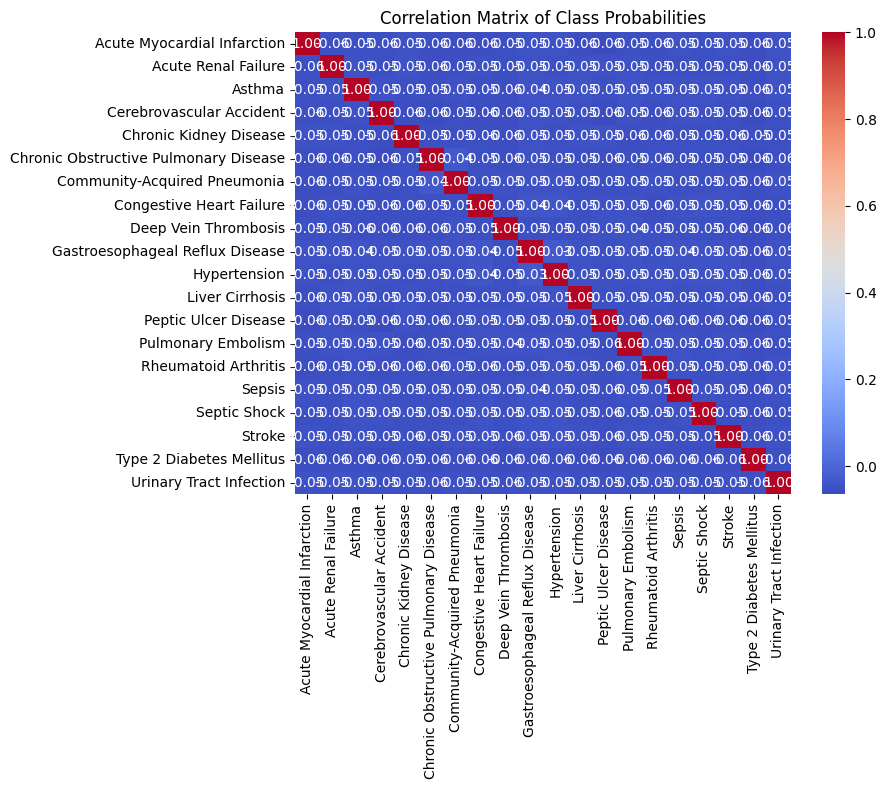

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get class probabilities
probs = model.predict_proba(X)

# Convert to DataFrame for visualization
df_probs = pd.DataFrame(probs, columns=le.classes_)

# Compute correlation matrix
corr_matrix = df_probs.corr()

# Plot it
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Class Probabilities")
plt.show()
